# What is the True Normal Human Body Temperature? 

#### Background

The mean normal body temperature was held to be 37$^{\circ}$C or 98.6$^{\circ}$F for more than 120 years since it was first conceptualized and reported by Carl Wunderlich in a famous 1868 book. But, is this value statistically correct?

<h3>Exercises</h3>

<p>In this exercise, you will analyze a dataset of human body temperatures and employ the concepts of hypothesis testing, confidence intervals, and statistical significance.</p>

<p>Answer the following questions <b>in this notebook below and submit to your Github account</b>.</p> 

<ol>
<li>  Is the distribution of body temperatures normal? 
    <ul>
    <li> Although this is not a requirement for the Central Limit Theorem to hold (read the introduction on Wikipedia's page about the CLT carefully: https://en.wikipedia.org/wiki/Central_limit_theorem), it gives us some peace of mind that the population may also be normally distributed if we assume that this sample is representative of the population.
    <li> Think about the way you're going to check for the normality of the distribution. Graphical methods are usually used first, but there are also other ways: https://en.wikipedia.org/wiki/Normality_test
    </ul>
<li>  Is the sample size large? Are the observations independent?
    <ul>
    <li> Remember that this is a condition for the Central Limit Theorem, and hence the statistical tests we are using, to apply.
    </ul>
<li>  Is the true population mean really 98.6 degrees F?
    <ul>
    <li> First, try a bootstrap hypothesis test.
    <li> Now, let's try frequentist statistical testing. Would you use a one-sample or two-sample test? Why?
    <li> In this situation, is it appropriate to use the $t$ or $z$ statistic? 
    <li> Now try using the other test. How is the result be different? Why?
    </ul>
<li>  Draw a small sample of size 10 from the data and repeat both frequentist tests. 
    <ul>
    <li> Which one is the correct one to use? 
    <li> What do you notice? What does this tell you about the difference in application of the $t$ and $z$ statistic?
    </ul>
<li>  At what temperature should we consider someone's temperature to be "abnormal"?
    <ul>
    <li> As in the previous example, try calculating everything using the boostrap approach, as well as the frequentist approach.
    <li> Start by computing the margin of error and confidence interval. When calculating the confidence interval, keep in mind that you should use the appropriate formula for one draw, and not N draws.
    </ul>
<li>  Is there a significant difference between males and females in normal temperature?
    <ul>
    <li> What testing approach did you use and why?
    <li> Write a story with your conclusion in the context of the original problem.
    </ul>
</ol>

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

#### Resources

+ Information and data sources: http://www.amstat.org/publications/jse/datasets/normtemp.txt, http://www.amstat.org/publications/jse/jse_data_archive.htm
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

****

In [156]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.distributions.empirical_distribution import ECDF
from statsmodels.graphics.gofplots import qqplot
from numpy.random import seed
from numpy.random import random

In [157]:
## Importing data 
data_r = pd.read_csv('C:/Users/jlpar/Documents/Springboard Data Files/human_body_temperature.csv')

In [158]:
df=data_r

In [159]:
df.describe()

,temperature,heart_rate
count,130.000000,130.000000
mean,98.249231,73.761538
std,0.733183,7.062077
min,96.300000,57.000000
25%,97.800000,69.000000
50%,98.300000,74.000000
75%,98.700000,79.000000
max,100.800000,89.000000


In [160]:
type(df)

pandas.core.frame.DataFrame

In [161]:
df.columns

Index(['temperature', 'gender', 'heart_rate'], dtype='object')

In [162]:
df.head(3)

,temperature,gender,heart_rate
0,99.3,F,68.0
1,98.4,F,81.0
2,97.8,M,73.0


Is the distribution of body temperatures normal?

The Body Temperature data was plotted using a histogram with density plot, ECDP Graph and QQ Plot below. The temperature data is from 130 samples taken from the population and appear to be normally distributed for this sample. There are two outliers below the lower interquatile range with a 96.3 degree body temperature and one outlier above the upper interquartile range with a value of 100.8 as shown in the df.describe statement.

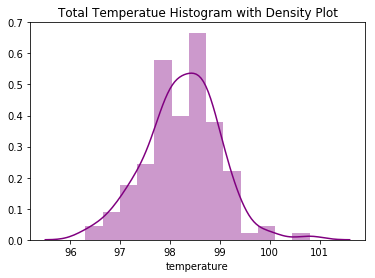

In [164]:
sns.distplot(df['temperature'], color = 'purple')
plt.title('Total Temperatue Histogram with Density Plot')
plt.show()

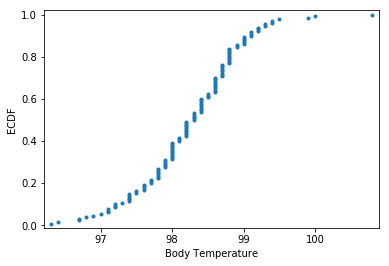

In [165]:
# Emperical Cumulative Distribution Function (ECDF) for Body Temperature
x = np.sort(df['temperature'])
y = np.arange(1, len(x)+1) / len(x)
plt.plot(x, y, marker='.', linestyle='none')
plt.xlabel('Body Temperature')
plt.ylabel('ECDF')
plt.margins(0.02) # Keeps data off plot edges
plt.show()

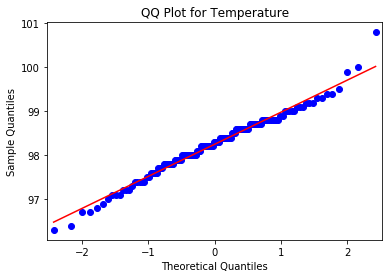

In [166]:
# q-q plot
qqplot(df.temperature, line='s')
plt.title('QQ Plot for Temperature')
plt.show()

In [167]:
# Is the distribution of body temperatures normal?
# Compute mean and standard deviation: mu, sigma

mu = np.mean(df['temperature'])
sigma = np.std(df['temperature'])

print(round(mu, 4))
print(round(sigma, 4))

98.2492
0.7304


Q2) Is the sample size large? Are the observations independent?

The sample size is greater than 30 and can be considered a large sample size.  Most sampling assumptions are assumed to be an independent sample from the dataset. The Central Limit Theory shows that if the sample size is large enough (n > 30) then the departure from the data sample is not too great, even when the source population is not normally distributed in the study.

In [168]:
## Q2 Using the desribe function to determine the sample size of the Temperature data set.  
df.temperature.describe()

count    130.000000
mean      98.249231
std        0.733183
min       96.300000
25%       97.800000
50%       98.300000
75%       98.700000
max      100.800000
Name: temperature, dtype: float64

Question 3) Is the true population mean really 98.6 degrees F?

The Bootstrap was calculated with a 95 % Confidence Interval to show the distribution of the samples from 
the Human Temperature.  The assignment asks for the T-Test and then a Z Test to be calculated and the results
can be seen below.  The T Test value is -5.45 with a p value of 2.41e-07 and the Z Test values was also -5.45 with a
p value of 4.90e-08 for this study.  The population standard deviation was not given so the appropiate test is the T
Test.  

Comparing the P value (p_val_t) to a 95% alpha level, the results show this value is much less than 0.05 
and we will reject the Null Hypothesis.  The null states that the sample size is no different than the population mean.  The 
alternative hypothesis is true and the true population is different than the sample body temperature.  

In [169]:
## Calculating the Bootstrap Confidence Interval for BodyTemperature with 95% Confidence Interval
from sklearn.utils import resample

temp = df.temperature

temp_bootstrap = []
for i in range(10000):
    
    np.random.seed(i)
    temp_bootstrap.append((resample(temp)))
print(len(temp_bootstrap))

10000


In [170]:
# Calculating the Bootstap means
bootstrap_means = np.mean(temp_bootstrap, axis=1)
bootstrap_means

array([98.13923077, 98.37538462, 98.26461538, ..., 98.26153846,
       98.19      , 98.24615385])

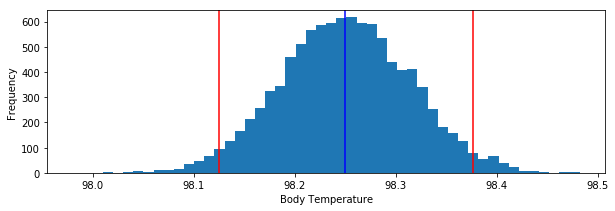

Lower bound @ 2.5%: 98.125
Upper bound @ 50%: 98.376
Middle bound@ 97.5%: 98.25


In [171]:
# Plotting the lower, Middle and Upper Bounds for the Body Temperature from this dataset.  
lower_bound = np.percentile(bootstrap_means, 2.5)
middle_bound = np.percentile (bootstrap_means, 50.0)
upper_bound = np.percentile(bootstrap_means, 97.5)

fig = plt.figure(figsize=(10,3))
ax = plt.hist(bootstrap_means, bins=50)

plt.xlabel('Body Temperature')
plt.ylabel('Frequency')
plt.axvline(lower_bound, color='r')
plt.axvline(middle_bound, color='b')
plt.axvline(upper_bound, color='r')
plt.show()

print('Lower bound @ 2.5%: {}'.format(round(lower_bound, 3)))
print('Upper bound @ 50%: {}'.format(round(upper_bound, 3)))
print('Middle bound@ 97.5%: {}'.format(middle_bound))

In [172]:
# Calculating the T Statistic and  P Value for a one sided test
import scipy

true_mu = 98.6
data1=df.temperature

t_stat, p_val_t = scipy.stats.ttest_1samp(data1, true_mu)
print('T Stat', t_stat)
print('p value', p_val_t)

T Stat -5.4548232923645195
p value 2.4106320415561276e-07


In [173]:
# Calculating the Z Statistic and  P Value for a one sided test
z_stat, p_val_t = scipy.stats.ttest_1samp(data1, true_mu)
print('z-statistic:',z_stat)
print('p value =',p_val_z)

z-statistic: -5.4548232923645195
p value = 4.9021570141012155e-08


In [174]:
alpha = 0.05
p_val_t < alpha

True

Q4) Draw a small sample of size 10 from the data and repeat both frequentist tests.  

A random sample of 10 was generated from the 130 samples for temperature in this dataset.  The T Stats and Z Stats along with the p values are calculated below.  The values will change depending on what sample has been drawn from the random draw for the 10 samples.  The P value for the Z Statistic is much lower when (4.9e-8) compared to the T Statistic and this is 0.905.  
These values change for each random sample and the p value for the T statsitic has some values barely less than the 0.05 alpha 
level and other values larger than this significance level.  

The T Statistic is the appropriate sample for this study because the standard deviation is not known in this 
example.  Also the sample size is also less than 30 and is the second criteria to be used in determining if the T or Z
score will be used for a sample.  

In [175]:
# Obtaining a random sample size of 10 from the 130 data points  to test the T and Z Statistic
sample = np.random.choice(df['temperature'], size=10)

In [178]:
## Calculating the T Statistic and P value with a random sample of 10
t_stat, p_val_t = scipy.stats.ttest_1samp(sample, true_mu)
print('T Stat', t_stat)
print('p value', p_val_t)

T Stat -0.7147562946136885
p value 0.49288161604442926


In [179]:
## Calculating the Z Statistic and P value with a random sample of 10
z_stat, p_val_t = scipy.stats.ttest_1samp(sample, true_mu)
print('z-statistic:',z_stat)
print('p value =',p_val_z)

z-statistic: -0.7147562946136885
p value = 4.9021570141012155e-08


Q5) At what temperature should we consider someone's temperature to be "abnormal"?

The 95% Confidence Interval was calculated using scipy stats function The lower value is at 96.82 and the 
upper value is at 99.69 for this dataset.  The values along with the mean are graphed below in a histogram
to give a visual on how the CI affects the sample size for this study.  Any temperature value that is 
less than 96.82 or greator than 99.69 is considered abnornal for this study based on the 95% CI.  

In [180]:
# calculate 95% confidence interval
from scipy import stats
CI = stats.norm.interval(alpha=0.95, 
                         loc=np.mean(df['temperature']), 
                         scale=np.std(df['temperature']))

print('95% Lower and Upper confidence interval:', CI)

95% Lower and Upper confidence interval: (96.81775582674824, 99.68070571171332)


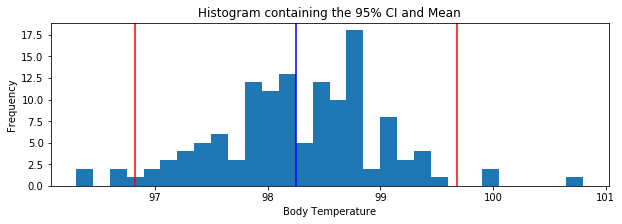

Lower CI @ 2.5%: 98.125
Mean @ 50 %: 98.25
Upper CI @ 97.5: 98.376


In [181]:
# Plotting the lower, Middle and Upper Bounds for the Body Temperature from this dataset.  
temp = df.temperature

lower_CI = 99.68
mean = 98.25
upper_CI = 96.82

fig = plt.figure(figsize=(10,3))
ax = plt.hist(temp, bins=30)

plt.title('Histogram containing the 95% CI and Mean')
plt.xlabel('Body Temperature')
plt.ylabel('Frequency')
plt.axvline(lower_CI, color='r')
plt.axvline(mean, color='b')
plt.axvline(upper_CI, color='r')
plt.show()

print('Lower CI @ 2.5%: {}'.format(round(lower_bound, 3)))
print('Mean @ 50 %: {}'.format(middle_bound))
print('Upper CI @ 97.5: {}'.format(round(upper_bound, 3)))

Q7 Is there a significant difference between males and females in normal temperature? The answer is at the 
end of this section along with the conclusion.

In [185]:
## Importing data                
data1 = pd.read_csv('C:/Users/jlpar/Documents/Springboard Data Files/male_body_temp.csv')   

In [186]:
data1.head()

,temperature,gender,heart_rate
0,97.8,M,73
1,99.2,M,83
2,98.0,M,71
3,98.8,M,78
4,98.2,M,72


In [183]:
## Importing data that divided up the temperature data set to two datasets based on gender
data2 = pd.read_csv('C:/Users/jlpar/Documents/Springboard Data Files/female_body_temp.csv')                  

In [187]:
data2.head()

,temperature,gender,heart_rate
0,99.3,F,68
1,98.4,F,81
2,99.2,F,66
3,98.0,F,73
4,98.4,F,84


In [188]:
combined = df.temperature

male_temp = []
female_temp = []

for i in range(10000):
    np.random.seed(i)
    male_temp.append(resample(combined, n_samples = len(data1.temperature)))
    female_temp.append(resample(combined, n_samples = len(data2.temperature)))
    
dif_bootstrap_means = (np.mean(male_temp, axis=1)-np.mean(female_temp, axis=1))
dif_bootstrap_means

array([-0.04461538, -0.20923077, -0.02769231, ...,  0.08      ,
        0.06615385,  0.01538462])

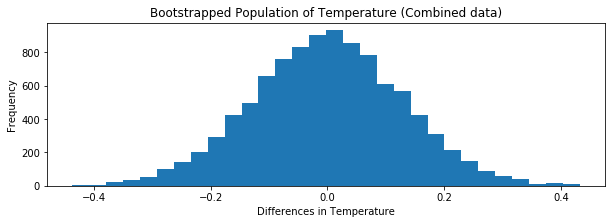

In [189]:
fig = plt.figure(figsize=(10,3))
ax = plt.hist(dif_bootstrap_means, bins=30)

plt.xlabel('Differences in Temperature')
plt.ylabel('Frequency')
plt.title('Bootstrapped Population of Temperature (Combined data)')
plt.show()

In [190]:
obs_difs = (np.mean(male_temp) - np.mean(female_temp))
print('observed difference in means: {}'.format(obs_difs))

observed difference in means: -0.000680769230768874


In [191]:
p_value = dif_bootstrap_means[dif_bootstrap_means >= obs_difs].shape[0]/10000
print('p-value: {}'.format(p_value))

p-value: 0.5011


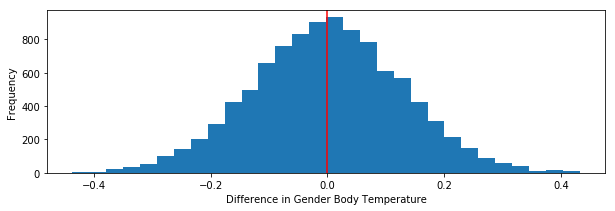

In [192]:
fig = plt.figure(figsize=(10,3))
ax = plt.hist(dif_bootstrap_means, bins=30)

plt.xlabel('Difference in Gender Body Temperature')
plt.ylabel('Frequency')
plt.axvline(obs_difs, color='r')
plt.show()

Q6)  Is there a significant difference between males and females in normal temperature?

The Bootstrap Hypothesis Testing was used to compare the male and female body temperatures in this study.  The sample
was divided into data1 which had the temperature for males and data2 which had the female temperatures.  The code
generated 10,000 samples from the combined original dataset and then calcuated the difference in sample means.  A histogram
was generated to see the distribution of the differences in the sample means.  The p value was also calcualted from the bootstrap distribution and observed difference of means and graphed below.

The large p value of 0.501 shows no significant difference in the means between gender and the null hypothesis 
cannot be rejected at this time.  

CONCLUSIONS

Body temperature does vary from the 37 ∘ C or 98.6 ∘ value that was established by Carl Wunderlich in a famous 1868 book. However this distribution that was sampled does appear to be normal from this study.  If the body temperature is outside of the 95% Confidence Interval for a value less than 96.81 or more than 99.69, it is considered abnormal from the previous tests.  Finally there was no significant difference between gender temperature from this study based on the Bootstrap Hypothesis Testing.  